# Algorithme "constant time"

In [4]:
x = int(input("Enter a number: "))

print(f"{x} is even") if (x % 10 == (0 or 2 or 4 or 6 or 8)) else print(f"{x} is odd")

13 is odd


# Algorithme "linearly time"

In [7]:
x, y = int(input("Enter a number: ")), int(input("Enter another number: "))

print(x+y)

354


# Algorithme "exponentially time"

In [14]:
import random as rd

x = rd.randint(1, 1000)
for i in range(1000):
    if x == i:
        print(f"{i} is the number")

678 is the number


# Factoristion

In [17]:
x = 2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

p = 64135289477071580278790190170577389084825014742943447208116859632024532344630238623598752668347708737661925585694639798853367
q = 33372027594978156556226010605355114227940760344767554666784520987023841729210037080257448673296881877565718986258036932062711

p*q == x  # Evaluates to 'True'

# from sympy.ntheory import primefactors
# primefactors(x)
# way too slow

True

# A simple program

configrc.store_credentials:WARNING:2023-01-05 17:11:51,766: Credentials already present. Set overwrite=True to overwrite.


Running on ibmq_belem
Job Status: job has successfully run


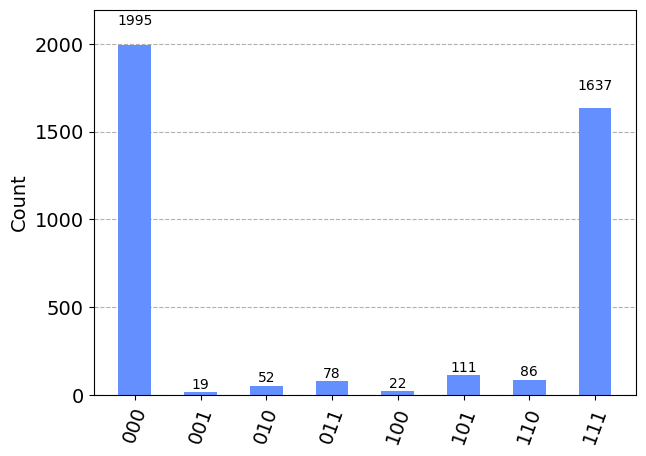

In [18]:
# 1. Create a simple quantum program called a 'quantum circuit'.
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, [1, 2])
qc.measure_all()

# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
from qiskit.providers.ibmq import IBMQ, least_busy
IBMQ.save_account(token="1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(qc, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())